In [126]:
import os
import pandas as pd
import numpy as np

In [127]:
dat=pd.read_csv("C:\\Users\\royku\\Sem II Modules\\All Used Data\\credit_history.csv")
dat.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [128]:
dat.isnull().sum() #Checking for missing values

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [129]:
dat['years'].describe() #Imputing value for missing years data by median value

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [130]:
dat['years'].fillna(4,inplace=True)

In [131]:
X=dat.drop("default",axis=1) #Creating Predictor Metrix by removing 'default' column from dataset
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [132]:
X=pd.get_dummies(X) #This is convert the non-numeric columns to numeric representation.(One hot Encoding)
X.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [133]:
Y = dat['default'] #Creating Target 

### Splitting of dataset into test & train dataset by using model_selection module

In [134]:
import sklearn.model_selection as ms
X_train,X_test,Y_train,Y_test=ms.train_test_split(X,Y,test_size=0.2,random_state=200)

In [135]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test) #Accuracy points

0.6274256144890039

In [136]:
import sklearn.metrics as metrics
metrics.roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1]) #Score of more than 50% is considerable. Area under curve is acceptable

0.6721250820352787

In [137]:
clf.predict_proba(X_test)

array([[0.7838765 , 0.2161235 ],
       [0.7838765 , 0.2161235 ],
       [0.866171  , 0.133829  ],
       ...,
       [0.33271144, 0.66728856],
       [0.62803532, 0.37196468],
       [0.49720149, 0.50279851]])

### To visualize the DT

In [138]:
os.getcwd()

'C:\\Users\\royku\\Sem II Modules'

In [139]:
data_dir = 'C:\\Users\\royku\\Sem II Modules'

In [140]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir)

In [141]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [142]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<grade_A &le; 0.5<br/>gini = 0.499<br/>samples = 100.0%<br/>value = [0.525, 0.475]<br/>class = 0>, fillcolor="#fdf3ec"] ;\n1 [label=<grade_B &le; 0.5<br/>gini = 0.495<br/>samples = 73.0%<br/>value = [0.452, 0.548]<br/>class = 1>, fillcolor="#dceefa"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<income &le; 64996.0<br/>gini = 0.466<br/>samples = 41.0%<br/>value = [0.37, 0.63]<br/>class = 1>, fillcolor="#add6f4"] ;\n1 -> 2 ;\n3 [label=<gini = 0.444<br/>samples = 26.0%<br/>value = [0.333, 0.667]<br/>class = 1>, fillcolor="#9ccef2"] ;\n2 -> 3 ;\n4 [label=<gini = 0.491<br/>samples = 15.0%<br/>value = [0.434, 0.566]<br/>class = 1>, fillcolor="#d1e8f9"] ;\n2 -> 4 ;\n5 [label=<income &le; 55981.5<br/>gini = 0.493<br/>samples = 32.0%<br/>value = [0.557, 0.443]<br/>class = 0>, fillcolor="#fae5d6"] ;\n1 -> 5 ;\n6 [label=<gini = 0.5<b

In [143]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [144]:
from IPython.display import Image

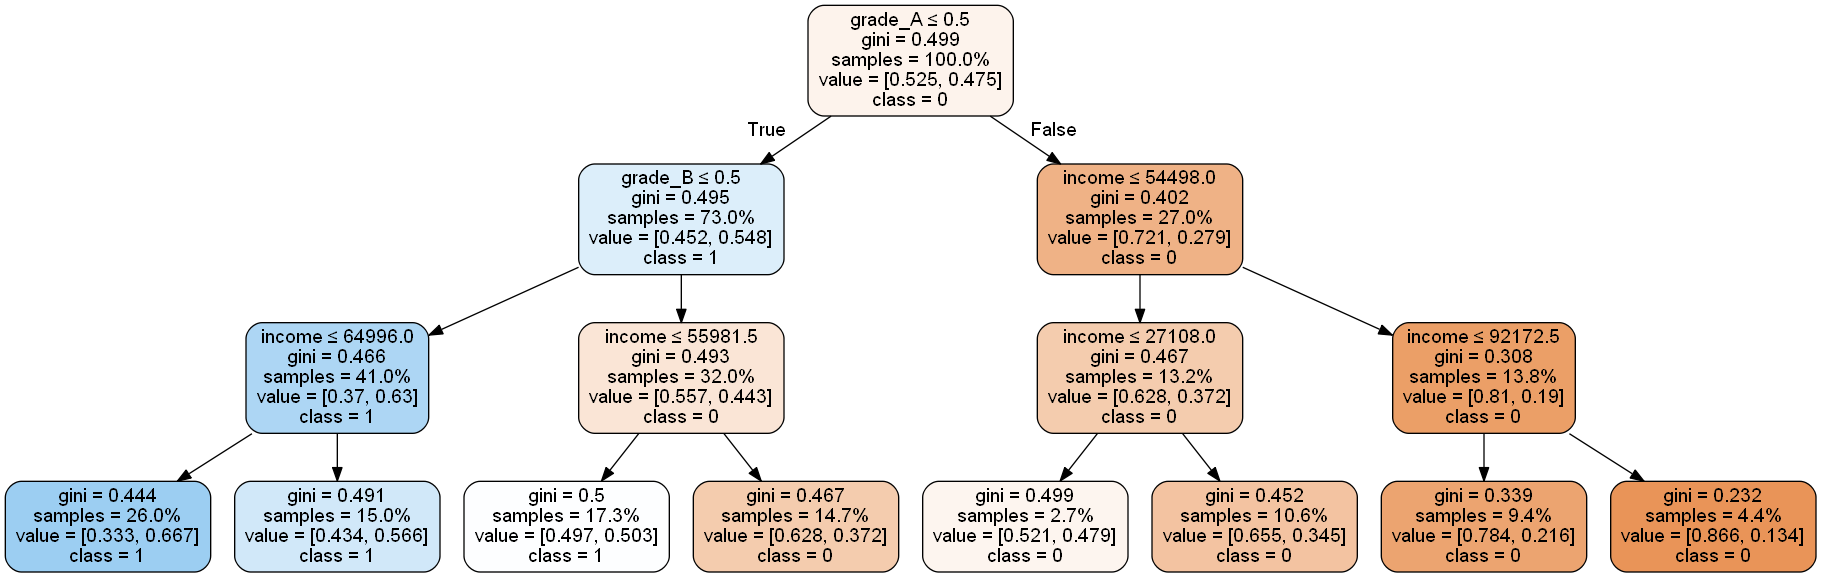

In [145]:
Image(graph.create_png())

### Grid Search-Cross Validation

In [146]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [147]:
import sklearn.model_selection as model_selection

In [148]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=200),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [149]:
mod.best_params_

{'max_depth': 2}

In [150]:
mod.best_estimator_ # Max Depth is selected at 2

DecisionTreeClassifier(max_depth=2, random_state=200)

In [151]:
mod.best_score_

0.6314528049645112

In [152]:
mod_CV=tree.DecisionTreeClassifier(max_depth=2).fit(X_train,Y_train)

In [153]:
dot_data = tree.export_graphviz(mod_CV, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=False)

In [154]:
graph = pydotplus.graph_from_dot_data(dot_data)

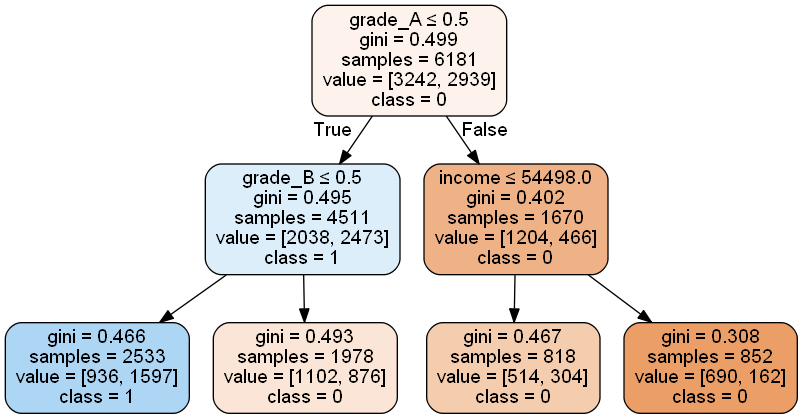

In [155]:
Image(graph.create_png())

## Changing criteria with different hyper parameter tuning

In [156]:
clf1=tree.DecisionTreeClassifier(max_depth=3,criterion='entropy',splitter='random',random_state=200)

In [157]:
clf1.fit(X_train,Y_train)
clf1.score(X_test,Y_test)

0.6319534282018111

In [158]:
import sklearn.metrics as metrics
metrics.roc_auc_score(Y_test,clf1.predict_proba(X_test)[:,1])

0.6506720196081058

In [159]:
dot_data1 = tree.export_graphviz(clf1, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [160]:
graph1 = pydotplus.graph_from_dot_data(dot_data1)

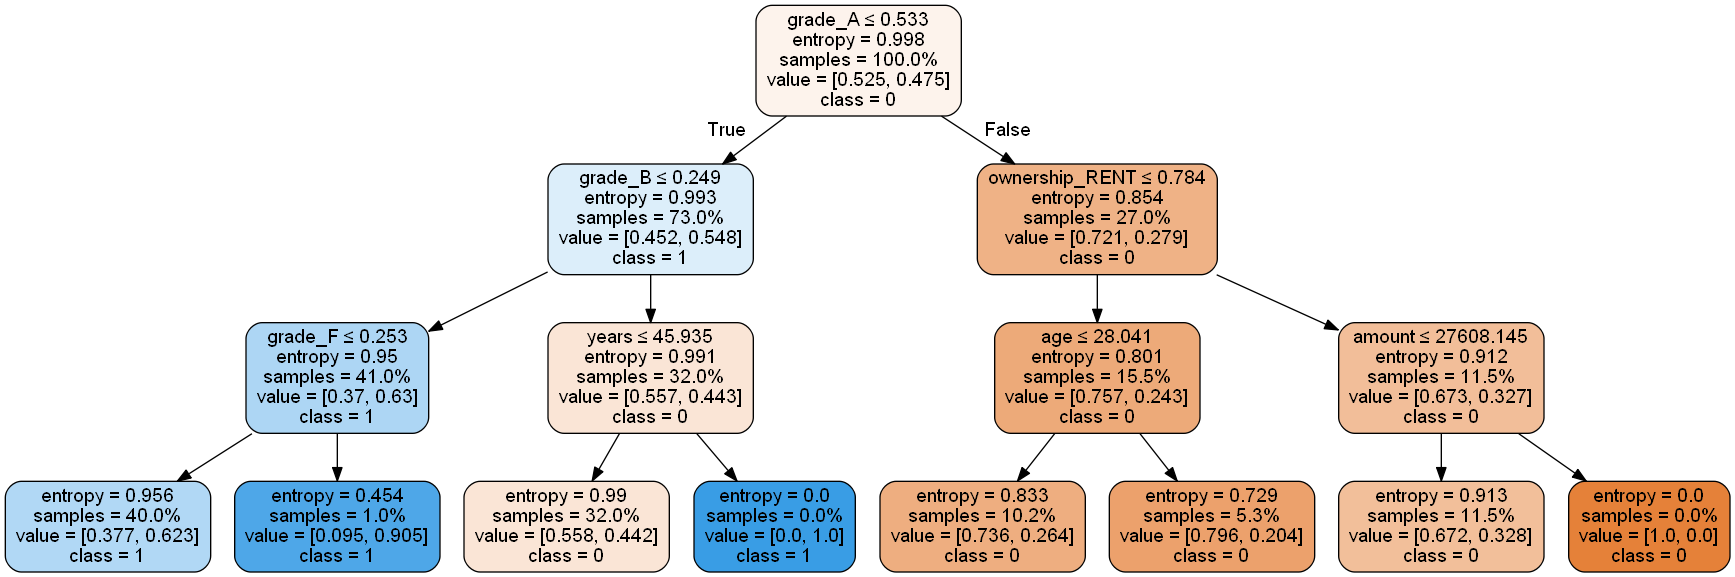

In [161]:
from IPython.display import Image
Image(graph1.create_png())  

#### Now we can compare and see how the splitting has changed. In earlier model the class imbalance was based on grade and income. For this model, we can see that other parameters such as age, ownership, years have also been considered.

In [162]:
#For cross validation
clf1=tree.DecisionTreeClassifier(max_depth=3,criterion='entropy',splitter='random',random_state=200)
mod1=model_selection.GridSearchCV(clf1,param_grid={'max_depth':[2,3,4,5,6]})
mod1.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              random_state=200,
                                              splitter='random'),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [163]:
mod1.best_params_

{'max_depth': 2}

In [164]:
mod1.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=200,
                       splitter='random')

In [123]:
mod1.best_score_ #similar score to gini purity metrics

0.6314528049645112

In [170]:
mod1_CV=tree.DecisionTreeClassifier(max_depth=3).fit(X_train,Y_train)

In [171]:
dot_data2 = tree.export_graphviz(mod1_CV, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=False)

In [172]:
graph1 = pydotplus.graph_from_dot_data(dot_data1)

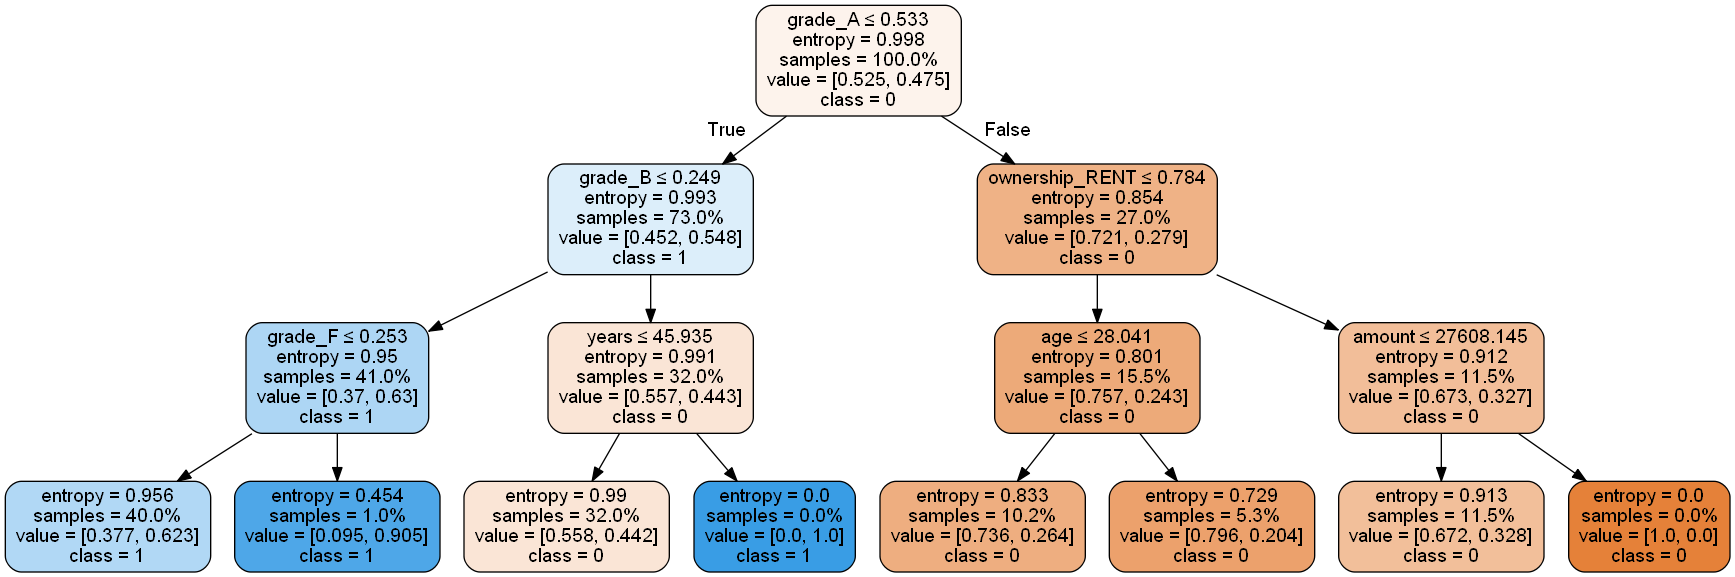

In [173]:
Image(graph1.create_png())